In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

df_music2 = df_music.copy()
df_music2.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [2]:
count_genre = df_music2.value_counts('genre')
count_genre

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
dtype: int64

In [3]:
Percent_genre_artist = ((df_music2.value_counts('genre', 'artist_name'))*100)

In [4]:
df_music2.drop(columns=['time_signature', 'key', 'track_id',], inplace=True)

In [ ]:
df_music2[(df_music2['genre'] == 'Children’s Music') | (df_music2['genre'] == "Children's Music")]
#Children’s Music	
#Children's Music

In [6]:
df_music2.drop(df_music2[(df_music2['genre'] == 'Soundtrack') | (df_music2['genre'] == 'Movie')].index, inplace=True)
df_music2 = df_music2.reset_index(drop=True)

In [7]:
df_music2['genre'].replace("Children’s Music", "Children's Music", inplace=True)


In [8]:
(df_music2['genre'] == "Children's Music").value_counts()

False    200517
True      14756
Name: genre, dtype: int64

In [9]:
#transform ms en s
df_music2['duration_ms'] = round(df_music2['duration_ms']/1000,2)

In [10]:
#rename columns ms
df_music2.rename(columns={'duration_ms':'duration_sec'},inplace=True)


In [11]:
df_corr = df_music2.corr()
df_corr

popularity  acousticness  danceability  duration_sec  \
popularity          1.000000     -0.355911      0.249355     -0.017508   
acousticness       -0.355911      1.000000     -0.319411      0.045207   
danceability        0.249355     -0.319411      1.000000     -0.174933   
duration_sec       -0.017508      0.045207     -0.174933      1.000000   
energy              0.211830     -0.705311      0.242831     -0.073671   
instrumentalness   -0.217242      0.268818     -0.261989      0.139375   
liveness           -0.186511      0.096053     -0.076808      0.016383   
loudness            0.361821     -0.684575      0.370906     -0.103525   
speechiness        -0.174084      0.186531      0.108641     -0.042563   
tempo               0.075693     -0.229280     -0.025812     -0.037485   
valence             0.044637     -0.292286      0.496204     -0.179726   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.211830         -0.217242 -0.186511  0.361821    -0.174084   
acousticness     -0.705311          0.268818  0.096053 -0.684575     0.186531   
danceability      0.242831         -0.261989 -0.076808  0.370906     0.108641   
duration_sec     -0.073671          0.139375  0.016383 -0.103525    -0.042563   
energy            1.000000         -0.307850  0.182056  0.801218     0.130780   
instrumentalness -0.307850          1.000000 -0.110825 -0.443437    -0.157910   
liveness          0.182056         -0.110825  1.000000  0.015762     0.518445   
loudness          0.801218         -0.443437  0.015762  1.000000    -0.032652   
speechiness       0.130780         -0.157910  0.518445 -0.032652     1.000000   
tempo             0.209893         -0.071709 -0.064729  0.211277    -0.096155   
valence           0.389045         -0.214210 -0.015219  0.344497    -0.005759   

                     tempo   valence  
popularity        0.075693  0.044637  
acousticness     -0.229280 -0.292286  
danceability     -0.025812  0.496204  
duration_sec     -0.037485 -0.179726  
energy            0.209893  0.389045  
instrumentalness -0.071709 -0.214210  
liveness         -0.064729 -0.015219  
loudness          0.211277  0.344497  
speechiness      -0.096155 -0.005759  
tempo             1.000000  0.107658  
valence           0.107658  1.000000

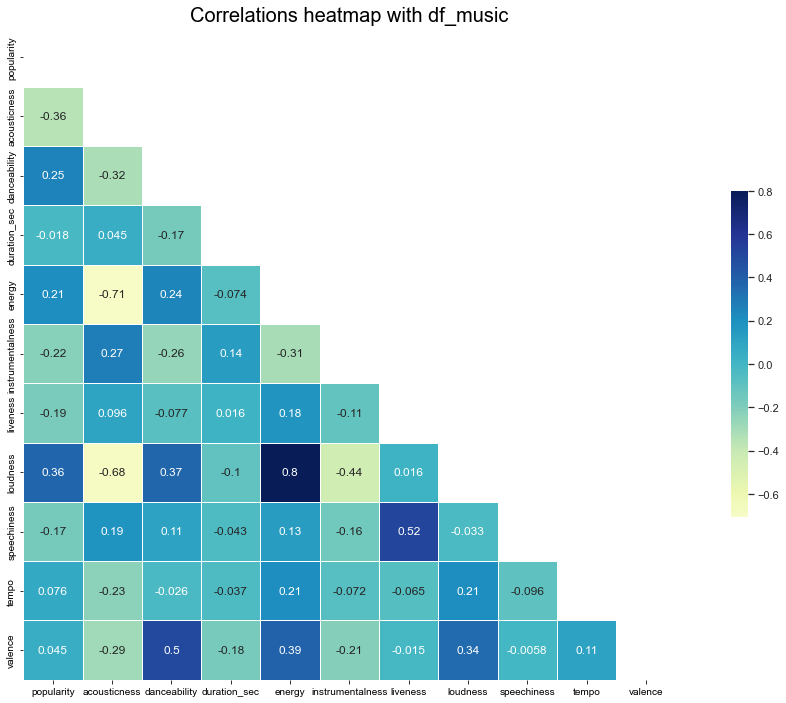

In [12]:
#taille heatmap
plt.subplots(figsize=(20, 12))

#style
sns.set_theme(style="white")

#heatmap with only direction
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# heatmap
sns.heatmap(df_corr,                    
                              
            cmap="YlGnBu",              # palette de couleur
            mask=mask,
            center=0,                   # La valeur à laquelle centrer la palette de couleurs 
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            annot=True,                 # afficher les valeurs           
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().

plt.title('Correlations heatmap with df_music', size = 20)

plt.show()

In [61]:
Percent_popularity_genre = round(((df_music2.value_counts('genre', 'popularity'))*100),3)

Percent_genre_danceability = round(((df_music2.value_counts('genre', 'danceability'))*100),3)

popularity_genre = round(df_music2.groupby(by=['genre']).mean('popularity'),2).sort_values(['popularity'], ascending=False).reset_index()

best_genre_valence = round(df_music2.groupby(by=['genre']).mean('valence'),2).sort_values(['valence'], ascending=False).reset_index()

best_popularity_valence = round(df_music2.groupby(by=['genre','popularity']).mean('valence'),2).sort_values(['valence', 'popularity'], ascending=False).reset_index()[:21]

In [63]:
best_popularity_valence = best_popularity_valence[['valence','popularity','danceability','duration_sec','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo'	]]
best_popularity_valence
 

valence  popularity  danceability  duration_sec  acousticness  energy  \
0      0.98          79          0.70        214.83          0.11    0.81   
1      0.96          83          0.73        239.60          0.14    0.71   
2      0.93          75          0.72        172.93          0.09    0.52   
3      0.93           9          0.48        266.39          0.68    0.63   
4      0.92          55          0.74         58.51          0.91    0.53   
5      0.92          36          0.61        171.48          0.02    0.88   
6      0.91          97          0.76        158.04          0.56    0.48   
7      0.91           5          0.72        140.92          0.48    0.83   
8      0.89          92          0.79        190.00          0.44    0.63   
9      0.89          80          0.60        283.80          0.18    0.60   
10     0.89          76          0.73        184.78          0.02    0.80   
11     0.88          23          0.68        314.18          0.45    0.65   
12     0.87           8          0.59        172.83          0.21    0.76   
13     0.86          86          0.72        256.42          0.04    0.79   
14     0.86          85          0.72        256.42          0.04    0.79   
15     0.86          84          0.83        193.44          0.22    0.78   
16     0.85           9          0.70        178.86          0.31    0.63   
17     0.84          77          0.85        230.92          0.20    0.74   
18     0.84          76          0.86        183.11          0.00    0.47   
19     0.84          73          0.55        247.00          0.23    0.65   
20     0.84           5          0.44        141.08          0.00    0.91   

    instrumentalness  liveness  loudness  speechiness   tempo  
0               0.00      0.18     -8.20         0.03  125.94  
1               0.12      0.10     -5.85         0.03  127.98  
2               0.00      0.08     -9.72         0.35   76.52  
3               0.00      0.12     -8.60         0.25  170.04  
4               0.00      0.31     -7.35         0.14  170.01  
5               0.11      0.10     -4.81         0.03  124.02  
6               0.00      0.07     -5.57         0.05   89.91  
7               0.00      0.23     -5.39         0.11  200.04  
8               0.00      0.16     -5.55         0.04   94.04  
9               0.00      0.09    -12.14         0.03   97.80  
10              0.00      0.09     -7.93         0.05  122.93  
11              0.27      0.77     -8.61         0.05  112.10  
12              0.00      0.70     -7.82         0.06  112.50  
13              0.00      0.24     -5.41         0.17  176.01  
14              0.00      0.24     -5.41         0.17  176.01  
15              0.01      0.34     -4.54         0.06  129.98  
16              0.00      0.26     -6.62         0.23   93.46  
17              0.00      0.20     -6.76         0.07  123.67  
18              0.00      0.27     -8.53         0.05   89.12  
19              0.00      0.14    -11.49         0.04   93.38  
20              0.68      0.09     -6.31         0.03  169.95

In [64]:
fig = go.Figure() 

# mean actor and actress together per year
fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.popularity, 
                    name="*r",
                    line_shape='spline',
                    line_color='green'))

# mean only actress per year
fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.danceability,
                    name="**",
                    line_shape='spline',
                    line_color='rgb(231,107,243)'))

'''# mean only actor per year
fig.add_trace(go.Scatter(x=best_popularity_valence.startYear, 
                    y=best_popularity_valence.mean_age_actors,
                    name="Actors",
                    line_shape='spline',
                    line_color='blue'))'''


fig.update_layout(title ='<b>***8<b>',
                    title_x = 0.5,
                    
                    width=1300,
                    height=600,
                    legend_title="***",
                    template='plotly_dark',
                    font_size=13
                    )

fig.show()

In [ ]:
fig = go.Figure() 

# mean actor and actress together per year
fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.popularity, 
                    name="*r",
                    line_shape='spline',
                    line_color='green'))

# mean only actress per year
fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.danceability,
                    name="**",
                    line_shape='spline',
                    line_color='rgb(231,107,243)'))

'''# mean only actor per year
fig.add_trace(go.Scatter(x=best_popularity_valence.startYear, 
                    y=best_popularity_valence.mean_age_actors,
                    name="Actors",
                    line_shape='spline',
                    line_color='blue'))'''


fig.update_layout(title ='<b>***8<b>',
                    title_x = 0.5,
                    
                    width=1300,
                    height=600,
                    legend_title="***",
                    template='plotly_dark',
                    font_size=13
                    )

fig.show()

In [32]:
best_genre_valence

genre  popularity  acousticness  danceability  duration_sec  \
0             Reggae       35.59          0.19          0.70        239.50   
1          Reggaeton       37.74          0.22          0.73        232.04   
2                Ska       28.61          0.10          0.53        191.55   
3              Blues       34.74          0.33          0.53        251.93   
4            Country       46.10          0.27          0.58        217.24   
5   Children's Music       36.20          0.32          0.60        199.66   
6              Dance       57.28          0.15          0.64        226.26   
7               Rock       59.62          0.20          0.54        237.00   
8               Jazz       40.82          0.50          0.59        265.65   
9                Pop       66.59          0.22          0.64        220.86   
10              Soul       47.03          0.36          0.62        234.71   
11           Hip-Hop       58.42          0.18          0.72        219.98   
12               Rap       60.53          0.17          0.70        219.85   
13               R&B       52.31          0.29          0.64        225.75   
14       Alternative       50.21          0.16          0.54        233.24   
15              Folk       49.94          0.46          0.53        235.81   
16             Anime       24.26          0.29          0.47        229.94   
17             Indie       54.70          0.33          0.57        224.15   
18            Comedy       21.34          0.79          0.56        235.31   
19        Electronic       38.06          0.12          0.62        269.20   
20         A Capella        9.30          0.83          0.41        204.47   
21             World       35.52          0.39          0.44        315.33   
22         Classical       29.28          0.87          0.31        310.34   
23             Opera       13.34          0.95          0.29        259.16   

    energy  instrumentalness  liveness  loudness  speechiness   tempo  valence  
0     0.64              0.04      0.19     -7.52         0.12  118.16     0.68  
1     0.75              0.00      0.21     -5.88         0.13  120.99     0.66  
2     0.82              0.06      0.24     -6.17         0.09  129.43     0.65  
3     0.61              0.10      0.23     -9.05         0.06  121.14     0.58  
4     0.64              0.01      0.19     -7.34         0.05  123.41     0.54  
5     0.59              0.09      0.18     -8.40         0.10  121.64     0.53  
6     0.70              0.04      0.19     -6.05         0.08  120.80     0.52  
7     0.68              0.05      0.19     -7.29         0.05  122.63     0.52  
8     0.47              0.36      0.17    -11.21         0.07  111.78     0.51  
9     0.64              0.02      0.18     -6.50         0.11  121.18     0.48  
10    0.53              0.06      0.18     -8.87         0.08  115.32     0.48  
11    0.64              0.01      0.20     -6.86         0.21  120.79     0.47  
12    0.65              0.01      0.20     -6.67         0.19  121.10     0.46  
13    0.56              0.03      0.18     -7.60         0.12  116.37     0.45  
14    0.71              0.06      0.20     -6.54         0.09  122.53     0.45  
15    0.49              0.08      0.17     -9.87         0.05  118.75     0.44  
16    0.67              0.28      0.19     -7.92         0.07  126.63     0.44  
17    0.58              0.09      0.17     -7.92         0.07  119.29     0.43  
18    0.68              0.00      0.72    -11.69         0.85   98.24     0.41  
19    0.74              0.35      0.21     -7.04         0.10  125.85     0.39  
20    0.25              0.01      0.14    -13.66         0.04  111.52     0.33  
21    0.51              0.23      0.23    -10.71         0.05  119.82     0.30  
22    0.18              0.60      0.16    -21.54         0.05  104.34     0.21  
23    0.17              0.23      0.22    -19.34         0.06  101.80     0.19

In [31]:
popularity_genre

genre  popularity  acousticness  danceability  duration_sec  \
0                Pop       66.59          0.22          0.64        220.86   
1                Rap       60.53          0.17          0.70        219.85   
2               Rock       59.62          0.20          0.54        237.00   
3            Hip-Hop       58.42          0.18          0.72        219.98   
4              Dance       57.28          0.15          0.64        226.26   
5              Indie       54.70          0.33          0.57        224.15   
6                R&B       52.31          0.29          0.64        225.75   
7        Alternative       50.21          0.16          0.54        233.24   
8               Folk       49.94          0.46          0.53        235.81   
9               Soul       47.03          0.36          0.62        234.71   
10           Country       46.10          0.27          0.58        217.24   
11              Jazz       40.82          0.50          0.59        265.65   
12        Electronic       38.06          0.12          0.62        269.20   
13         Reggaeton       37.74          0.22          0.73        232.04   
14  Children's Music       36.20          0.32          0.60        199.66   
15            Reggae       35.59          0.19          0.70        239.50   
16             World       35.52          0.39          0.44        315.33   
17             Blues       34.74          0.33          0.53        251.93   
18         Classical       29.28          0.87          0.31        310.34   
19               Ska       28.61          0.10          0.53        191.55   
20             Anime       24.26          0.29          0.47        229.94   
21            Comedy       21.34          0.79          0.56        235.31   
22             Opera       13.34          0.95          0.29        259.16   
23         A Capella        9.30          0.83          0.41        204.47   

    energy  instrumentalness  liveness  loudness  speechiness   tempo  valence  
0     0.64              0.02      0.18     -6.50         0.11  121.18     0.48  
1     0.65              0.01      0.20     -6.67         0.19  121.10     0.46  
2     0.68              0.05      0.19     -7.29         0.05  122.63     0.52  
3     0.64              0.01      0.20     -6.86         0.21  120.79     0.47  
4     0.70              0.04      0.19     -6.05         0.08  120.80     0.52  
5     0.58              0.09      0.17     -7.92         0.07  119.29     0.43  
6     0.56              0.03      0.18     -7.60         0.12  116.37     0.45  
7     0.71              0.06      0.20     -6.54         0.09  122.53     0.45  
8     0.49              0.08      0.17     -9.87         0.05  118.75     0.44  
9     0.53              0.06      0.18     -8.87         0.08  115.32     0.48  
10    0.64              0.01      0.19     -7.34         0.05  123.41     0.54  
11    0.47              0.36      0.17    -11.21         0.07  111.78     0.51  
12    0.74              0.35      0.21     -7.04         0.10  125.85     0.39  
13    0.75              0.00      0.21     -5.88         0.13  120.99     0.66  
14    0.59              0.09      0.18     -8.40         0.10  121.64     0.53  
15    0.64              0.04      0.19     -7.52         0.12  118.16     0.68  
16    0.51              0.23      0.23    -10.71         0.05  119.82     0.30  
17    0.61              0.10      0.23     -9.05         0.06  121.14     0.58  
18    0.18              0.60      0.16    -21.54         0.05  104.34     0.21  
19    0.82              0.06      0.24     -6.17         0.09  129.43     0.65  
20    0.67              0.28      0.19     -7.92         0.07  126.63     0.44  
21    0.68              0.00      0.72    -11.69         0.85   98.24     0.41  
22    0.17              0.23      0.22    -19.34         0.06  101.80     0.19  
23    0.25              0.01      0.14    -13.66         0.04  111.52     0.33

In [15]:
popularity_genre2 = popularity_genre.iloc[:11]
popularity_genre2

genre  popularity  acousticness  danceability  duration_sec  energy  \
0           Pop       66.59          0.22          0.64        220.86    0.64   
1           Rap       60.53          0.17          0.70        219.85    0.65   
2          Rock       59.62          0.20          0.54        237.00    0.68   
3       Hip-Hop       58.42          0.18          0.72        219.98    0.64   
4         Dance       57.28          0.15          0.64        226.26    0.70   
5         Indie       54.70          0.33          0.57        224.15    0.58   
6           R&B       52.31          0.29          0.64        225.75    0.56   
7   Alternative       50.21          0.16          0.54        233.24    0.71   
8          Folk       49.94          0.46          0.53        235.81    0.49   
9          Soul       47.03          0.36          0.62        234.71    0.53   
10      Country       46.10          0.27          0.58        217.24    0.64   

    instrumentalness  liveness  loudness  speechiness   tempo  valence  
0               0.02      0.18     -6.50         0.11  121.18     0.48  
1               0.01      0.20     -6.67         0.19  121.10     0.46  
2               0.05      0.19     -7.29         0.05  122.63     0.52  
3               0.01      0.20     -6.86         0.21  120.79     0.47  
4               0.04      0.19     -6.05         0.08  120.80     0.52  
5               0.09      0.17     -7.92         0.07  119.29     0.43  
6               0.03      0.18     -7.60         0.12  116.37     0.45  
7               0.06      0.20     -6.54         0.09  122.53     0.45  
8               0.08      0.17     -9.87         0.05  118.75     0.44  
9               0.06      0.18     -8.87         0.08  115.32     0.48  
10              0.01      0.19     -7.34         0.05  123.41     0.54

In [16]:
df_music2.head()

genre     artist_name                                  track_name  \
0   R&B   Mary J. Blige                  Be Without You - Kendu Mix   
1   R&B         Rihanna                                   Desperado   
2   R&B       Yung Bleu  Ice On My Baby (feat. Kevin Gates) - Remix   
3   R&B        Surfaces                   Heaven Falls / Fall on Me   
4   R&B  Olivia O'Brien                                 Love Myself   

   popularity  acousticness  danceability  duration_sec  energy  \
0          65        0.0830         0.724        246.33   0.689   
1          63        0.3230         0.685        186.47   0.610   
2          62        0.0675         0.762        199.52   0.520   
3          61        0.3600         0.563        240.60   0.366   
4          68        0.5960         0.653        213.95   0.621   

   instrumentalness  liveness  loudness   mode  speechiness    tempo  valence  
0          0.000000    0.3040    -5.922  Minor       0.1350  146.496   0.6930  
1          0.000000    0.1020    -5.221  Minor       0.0439   94.384   0.3230  
2          0.000004    0.1140    -5.237  Minor       0.0959   75.047   0.0862  
3          0.002430    0.0955    -6.896  Minor       0.1210   85.352   0.7680  
4          0.000000    0.0811    -5.721  Minor       0.0409  100.006   0.4660

In [17]:
df_music2.describe()

popularity   acousticness   danceability   duration_sec  \
count  215273.000000  215273.000000  215273.000000  215273.000000   
mean       42.498776       0.341010       0.569594     237.923427   
std        17.693257       0.345431       0.175934     113.802428   
min         0.000000       0.000000       0.056900      15.390000   
25%        31.000000       0.031400       0.456000     186.900000   
50%        45.000000       0.195000       0.582000     222.650000   
75%        55.000000       0.653000       0.699000     267.290000   
max       100.000000       0.996000       0.989000    5552.920000   

              energy  instrumentalness       liveness       loudness  \
count  215273.000000     215273.000000  215273.000000  215273.000000   
mean        0.593895          0.120664       0.217983      -9.012030   
std         0.252921          0.273213       0.201019       5.546028   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.427000          0.000000       0.097400     -10.881000   
50%         0.628000          0.000028       0.130000      -7.434000   
75%         0.799000          0.014600       0.270000      -5.368000   
max         0.999000          0.997000       1.000000       3.744000   

         speechiness          tempo        valence  
count  215273.000000  215273.000000  215273.000000  
mean        0.124623     118.410102       0.470250  
std         0.189036      30.714987       0.253201  
min         0.022200      32.080000       0.000000  
25%         0.036900      93.895000       0.265000  
50%         0.051800     116.645000       0.462000  
75%         0.112000     139.906000       0.669000  
max         0.967000     242.903000       1.000000

In [33]:
fig = px.scatter_polar(popularity_genre, r="popularity", theta="genre",
                       color="genre", size="popularity",
                       color_discrete_sequence=px.colors.sequential.Plasma_r, # chercher une autre couleur
                       template="plotly_dark")

fig.update_layout(autosize=False)
fig.show()

In [ ]:
#sns.pairplot(data=popularity_genre, hue='popularity')

In [20]:

fig = px.line_polar(popularity_genre, r="danceability", theta="genre", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Bluered,
                    template="plotly_dark",
                    )

fig.update_traces(fill='toself')

fig.update_layout(autosize=False)

fig.show()

In [21]:

fig = px.histogram(df_music2, x = 'genre',
                   color='genre')

fig.update_layout(width=1000, height=800,
                  bargap=0.2,
                  title='<b>Genre<b>',
                  title_x = 0.5,
                  font_size = 15,
                  title_font_color="green",
                  xaxis_title='Genre',
                  yaxis_title='Popularity'
                  )

fig.update_layout(autosize=False)

fig.show()

In [ ]:
#test heatmap plotly
fig = go.Figure()

fig.add_trace(go.Heatmap(
    z = df_corr,
    x = df_corr.columns.values,
    y = df_corr.columns.values,
    colorscale = 'Viridis',
    zmid=0
))

fig.update_layout(width=900, height=700, title='Correlation Heatmap',
 autosize = False )

fig.show()